# Восстановление золота из руды

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных--" data-toc-modified-id="Подготовка-данных---1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных  <a name="подготовка" rel="nofollow"></a></a></span><ul class="toc-item"><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Проверка,-что-эффективность-обогащения-рассчитана-правильно.-Вычислияем-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Находим-MAE-между-нашими-расчётами-и-значением-признака-" data-toc-modified-id="Проверка,-что-эффективность-обогащения-рассчитана-правильно.-Вычислияем-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Находим-MAE-между-нашими-расчётами-и-значением-признака--1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проверка, что эффективность обогащения рассчитана правильно. Вычислияем её на обучающей выборке для признака rougher.output.recovery. Находим MAE между нашими расчётами и значением признака <a name="расчет" rel="nofollow"></a></a></span></li><li><span><a href="#Отсутвие-признаков-в-тестовом-датасете" data-toc-modified-id="Отсутвие-признаков-в-тестовом-датасете-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Отсутвие признаков в тестовом датасете</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Функция-для-визуализации-концентрации-металлов" data-toc-modified-id="Функция-для-визуализации-концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Функция для визуализации концентрации металлов</a></span></li><li><span><a href="#AU" data-toc-modified-id="AU-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>AU</a></span></li><li><span><a href="#AG" data-toc-modified-id="AG-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>AG</a></span></li><li><span><a href="#PB" data-toc-modified-id="PB-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>PB</a></span></li><li><span><a href="#Сравним-распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравним-распределения-размеров-гранул-исходного-сырья-на-обучающей-и-тестовой-выборках-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследуем-суммарную-концентрацию-металлов-на-разных-стадиях:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате." data-toc-modified-id="Исследуем-суммарную-концентрацию-металлов-на-разных-стадиях:-в-сырье,-в-черновом-концентрате,-в-концентрате-после-первой-очистки-и-в-финальном-концентрате.-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-вычисления-sMAPE" data-toc-modified-id="Функция-вычисления-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция вычисления sMAPE</a></span></li><li><span><a href="#Функция-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-вычисления-итоговой-sMAPE-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Функция вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-Опишите-выводы." data-toc-modified-id="Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-Опишите-выводы.-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.</a></span></li><li><span><a href="#Константая-модель-для-сравнения-показателей" data-toc-modified-id="Константая-модель-для-сравнения-показателей-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Константая модель для сравнения показателей</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Задача <a name="Задача"></a>
Подготовить прототип модели машинного обучения. Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Предоставленны данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Доп. информация:

Данные находятся в трёх файлах.

Данные индексируются датой и временем получения информации. Соседние по времени параметры часто похожи.
В распоряжении сырые данные: их просто выгрузили из хранилища. 
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

Необходимо:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.



## Подготовка данных  <a name="подготовка"></a>

In [40]:
# импорт библиотек
import pandas as pd
import numpy as np
from IPython.core.display import display, HTML
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor


In [2]:
display(HTML("<style>.container { width:75% !important; }</style>")) # больше не делаю, экран не такой большой как хотелось бы

In [3]:
random_state= 12345

In [4]:
data_train= pd.read_csv('/datasets/gold_industry_train.csv')
data_train = data_train.set_index('date')
print('Информация о датасете:')
display(data_train.info())
print('Первые 5 строк датасета:')
display(data_train.head())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
Index: 14579 entries, 2016-01-15 00:00:00 to 2017-12-09 13:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               14579 non-null  float64
 1   rougher.input.feed_ag                               14579 non-null  float64
 2   rougher.input.feed_pb                               14507 non-null  float64
 3   rougher.input.feed_sol                              14502 non-null  float64
 4   rougher.input.feed_rate                             14572 non-null  float64
 5   rougher.input.feed_size                             14478 non-null  float64
 6   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 7   rougher.input.floatbank10_xanthate                  14572 non-null  float64
 8   rougher.state.floatbank10_

None

Первые 5 строк датасета:


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


In [5]:
data_test = pd.read_csv('/datasets/gold_industry_test.csv')
data_test = data_test.set_index('date')
print('Информация о датасете:')
display(data_test.info())
print('Первые 5 строк датасета:')
display(data_test.head())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
Index: 4860 entries, 2017-12-09 14:59:59 to 2018-08-18 10:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       4860 non-null   float64
 1   rougher.input.feed_ag                       4860 non-null   float64
 2   rougher.input.feed_pb                       4832 non-null   float64
 3   rougher.input.feed_sol                      4838 non-null   float64
 4   rougher.input.feed_rate                     4856 non-null   float64
 5   rougher.input.feed_size                     4816 non-null   float64
 6   rougher.input.floatbank10_sulfate           4857 non-null   float64
 7   rougher.input.floatbank10_xanthate          4859 non-null   float64
 8   rougher.state.floatbank10_a_air             4859 non-null   float64
 9   rougher.state.floatbank10_a_level 

None

Первые 5 строк датасета:


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,-300.283401,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


In [6]:
data_full = pd.read_csv('/datasets/gold_industry_full.csv')
data_full = data_full.set_index('date')
print('Информация о датасете:')
display(data_full.info())
print('Первые 5 строк датасета:')
display(data_full.head())

Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.input.feed_au                               19439 non-null  float64
 1   rougher.input.feed_ag                               19439 non-null  float64
 2   rougher.input.feed_pb                               19339 non-null  float64
 3   rougher.input.feed_sol                              19340 non-null  float64
 4   rougher.input.feed_rate                             19428 non-null  float64
 5   rougher.input.feed_size                             19294 non-null  float64
 6   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 7   rougher.input.floatbank10_xanthate                  19431 non-null  float64
 8   rougher.state.floatbank10_

None

Первые 5 строк датасета:


,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,-400.074028,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,-400.200179,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,-399.752729,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


В условии задачи сказано, что данные индексируются датой и временем получения информации (признак date), по этому столбцу и продеинкировали датасеты

**<center> Описание данных </center>** <a name="описание"></a>

**Технологический процесс:**
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота
    
**Параметры этапов:**
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи
- Наименование признаков

**Возможные значения для блока [этап]:**
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

**Возможные значения для блока [тип_параметра]:**
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

### Пропуски

In [7]:
check = ['data_train','data_test','data_full']
for data_n in check:
    data_check = globals()[data_n]  # получаем датасет по его имени
    data_miss = data_check.isnull().sum()  # считаем количество пропусков в датасете
    total_miss = data_miss.sum()
    print(f"Количество пропусков в датасете {data_n}: {data_miss}")
    print()
    print('-------------------')
    print(f"Сумма пропусков в датасете {data_n}: {total_miss}")
    print('==================')

Количество пропусков в датасете data_train: rougher.input.feed_au       0
rougher.input.feed_ag       0
rougher.input.feed_pb      72
rougher.input.feed_sol     77
rougher.input.feed_rate     7
                           ..
final.output.recovery       0
final.output.tail_au        0
final.output.tail_ag        1
final.output.tail_pb       75
final.output.tail_sol       5
Length: 86, dtype: int64

-------------------
Сумма пропусков в датасете data_train: 3050
Количество пропусков в датасете data_test: rougher.input.feed_au                           0
rougher.input.feed_ag                           0
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
rougher.input.feed_rate                         4
rougher.input.feed_size                        44
rougher.input.floatbank10_sulfate               3
rougher.input.floatbank10_xanthate              1
rougher.state.floatbank10_a_air                 1
rougher.state.floatbank10_a_level          

В датасетах имеются пропуски. 
    
    - train = 3050
    - test = 375
    - full = 4481
    
Заполним их предыдущими значениями .fillna(method='bfill'), так как тут последовательные процессы.

In [8]:
for data_n in check:
    data_check = globals()[data_n]
    data_fill = data_check.fillna(method='bfill')
    globals()[data_n] = data_fill

In [9]:
# Проверяем повторно наличие пропусков после заполнения.
for data_n in check:
    data_check = globals()[data_n]  # получаем датасет по его имени
    data_miss = data_check.isnull().sum()  # считаем количество пропусков в датасете
    total_miss = data_miss.sum()
    print(f"Количество пропусков в датасете {data_n}: {data_miss}")
    print()
    print('-------------------')
    print(f"Сумма пропусков в датасете {data_n}: {total_miss}")
    print('==================')

Количество пропусков в датасете data_train: rougher.input.feed_au      0
rougher.input.feed_ag      0
rougher.input.feed_pb      0
rougher.input.feed_sol     0
rougher.input.feed_rate    0
                          ..
final.output.recovery      0
final.output.tail_au       0
final.output.tail_ag       0
final.output.tail_pb       0
final.output.tail_sol      0
Length: 86, dtype: int64

-------------------
Сумма пропусков в датасете data_train: 0
Количество пропусков в датасете data_test: rougher.input.feed_au                         0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_sol                        0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_b

Пропуски ликвидированы. 

### Дубликаты

In [10]:
# Цикл for для проверки каждого столбца каждого датасета
for data_n in check:  # Перебираем каждый датасет
    data_check = globals()[data_n]
    duplicates = data_check.duplicated().sum()
    print(f'Количество дублей {data_n}: {duplicates} ')
    

Количество дублей data_train: 0 
Количество дублей data_test: 0 
Количество дублей data_full: 0 


Явных дубликатов в датасетах не обнаружено. 

### Проверка, что эффективность обогащения рассчитана правильно. Вычислияем её на обучающей выборке для признака rougher.output.recovery. Находим MAE между нашими расчётами и значением признака <a name="расчет"></a>

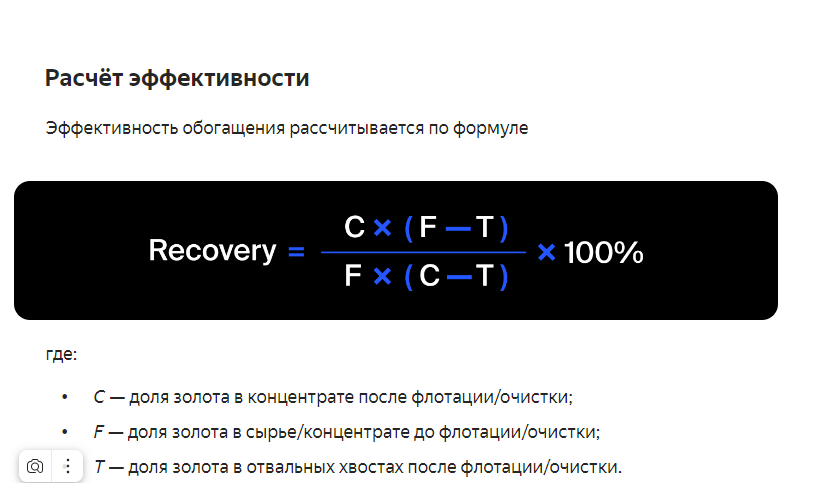

In [11]:
#напишем функцию для рассчета
def calculate(C, F, T, Recovery):
    rezult=(C * (F - T)) / (F * (C - T)) * 100
    return mean_absolute_error(Recovery, rezult)

In [12]:
mae = calculate(data_full['rougher.output.concentrate_au'], 
    data_full['rougher.input.feed_au'], 
    data_full['rougher.output.tail_au'],
    data_full['rougher.output.recovery'])
print(f'MAE rougher.output.recovery между имеющимся и рассчетным составляет: {mae}')

MAE rougher.output.recovery между имеющимся и рассчетным составляет: 9.871121473701021e-15


Полученное значение стремится к нулю, следовательно эффективность обогащения рассчитана корректно. 

### Отсутвие признаков в тестовом датасете

В условиях задачи говорится о том, что не все признаки попали в тестовый датасет. Давайте посмотрим на разницу. 

In [13]:
display(data_train.shape)
display(data_test.shape)
display(data_full.shape)

(14579, 86)

(4860, 52)

(19439, 86)

In [14]:
colums_test = set(data_train.columns) - set(data_test.columns)
colums_test

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовую выборку не попали признаки с параметром output  и calculation. В тестовой выборке оставлены те признаки, на которых моделей ранее должна обучаться. 

## Анализ данных

### Функция для визуализации концентрации металлов

In [15]:
def concentration(data, metal):
    # Определение имён столбцов для различных этапов обработки
    steps = [
        'rougher.input.feed_',
        'rougher.output.concentrate_',
        'primary_cleaner.output.concentrate_',
        'final.output.concentrate_'
    ]
    # Создание списка столбцов с концентрацией металла на каждом этапе
    metal_steps = [f'{step}{metal}' for step in steps]
    # Настройка размера фигуры
    plt.figure(figsize=(11, 6))
    # Визуализация гистограммы концентрации металла на каждом этапе
    for step in metal_steps:
        if step in data.columns:
            concentration = data[step]
            plt.hist(concentration, bins=30, alpha=0.5)
    # Настройка подписи оси X
    plt.xlabel('Концентрация')
    # Настройка подписи оси Y
    plt.ylabel('Кол-во')
    # Настройка заголовка
    plt.title(f'{metal}: изменение концентрации')
    # Настройка легенды
    plt.legend([f'{step}{metal}' for step in steps])
    # Отображение фигуры
    plt.show()

### AU

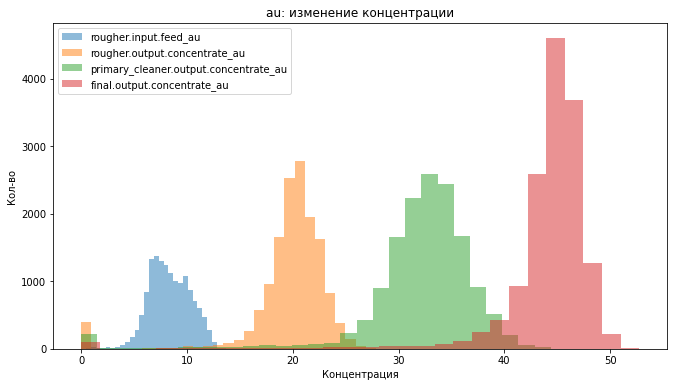

In [16]:
concentration(data_train, 'au')

Из гистограммы мы можем наблюдать, что на каждом шаге концетрация золота повышается. Также стоит отменить что есть нулевые или околонулевые концентрации. 

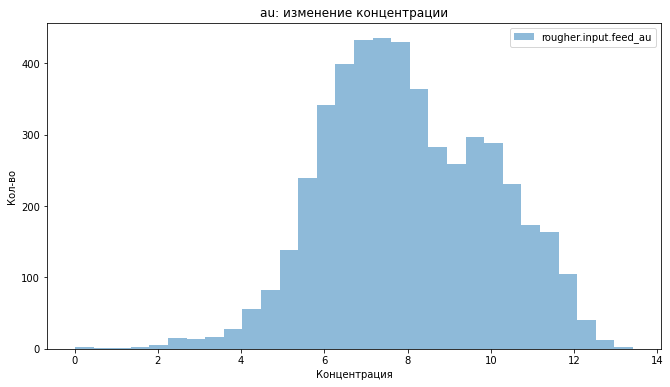

In [17]:
concentration(data_test, 'au')

В тестовой выборке имеется только 1 стадия наблюдения. 

### AG

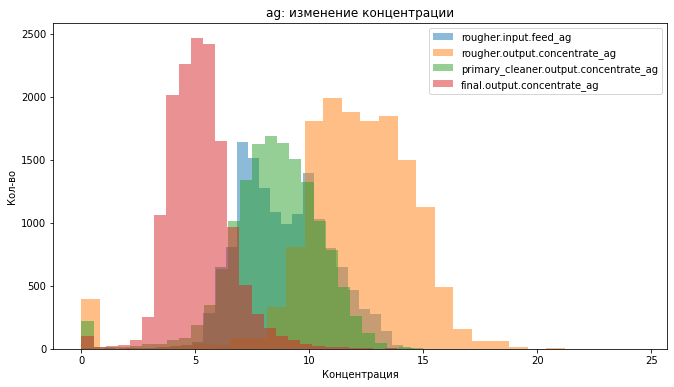

In [18]:
concentration(data_train, 'ag')

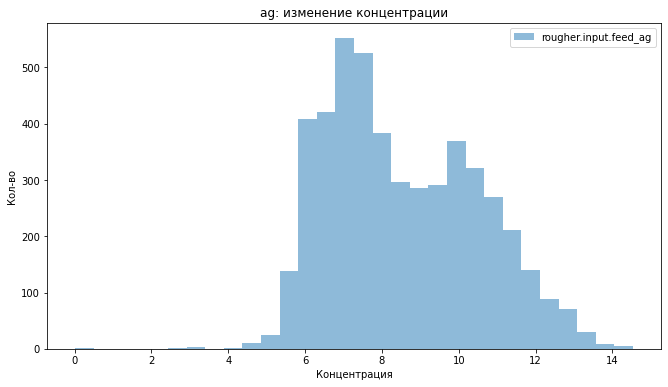

In [19]:
concentration(data_test, 'ag')

В тренеровочной выборке мы видим, как концентрациия сначала повышается, а затем идет на спад. В тренировочной же выборке мы также имеем наблюдения только 1 стадии. 

### PB

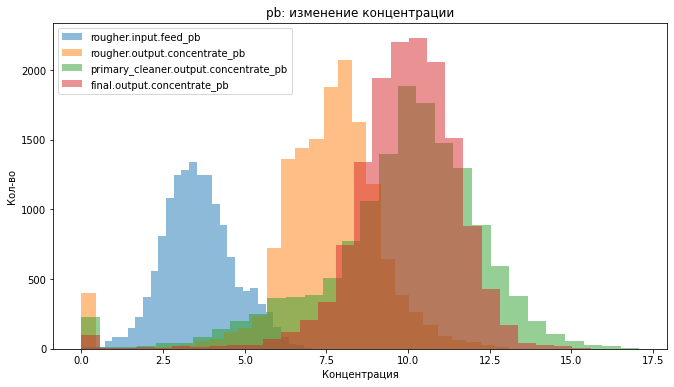

None

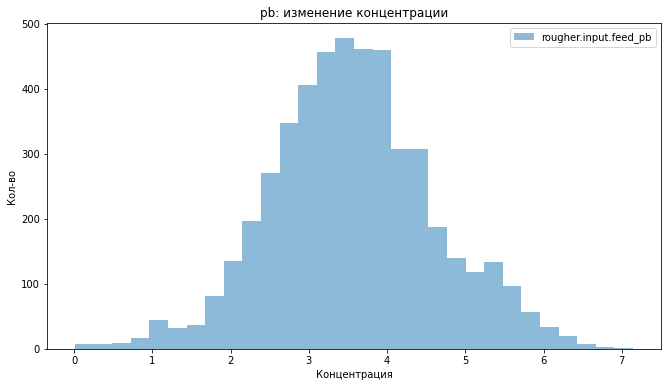

None

In [20]:
display(concentration(data_train, 'pb'))
display(concentration(data_test, 'pb'))

В тренировочной выборке концетрация растет в первых 3х этапах. В тестовой выборке все также имеются наблюдения только по 1 этапу. 

Избавимся от нулевых значений в датасетах, чтобы они не влияили на качество нашей модели. 

In [21]:
list = ['rougher.input.feed_au',
        'rougher.input.feed_ag',
        'rougher.input.feed_pb',
        'rougher.output.concentrate_au',
        'rougher.output.concentrate_ag',
        'rougher.output.concentrate_pb',
        'primary_cleaner.output.concentrate_au',
        'primary_cleaner.output.concentrate_ag',
        'primary_cleaner.output.concentrate_pb',
        'final.output.concentrate_au',
        'final.output.concentrate_ag',
        'final.output.concentrate_pb',
       ]
for col in list:
    data_train = data_train[data_train[col] >= 1].reset_index(drop=True)

###  Сравним распределения размеров гранул исходного сырья на обучающей и тестовой выборках

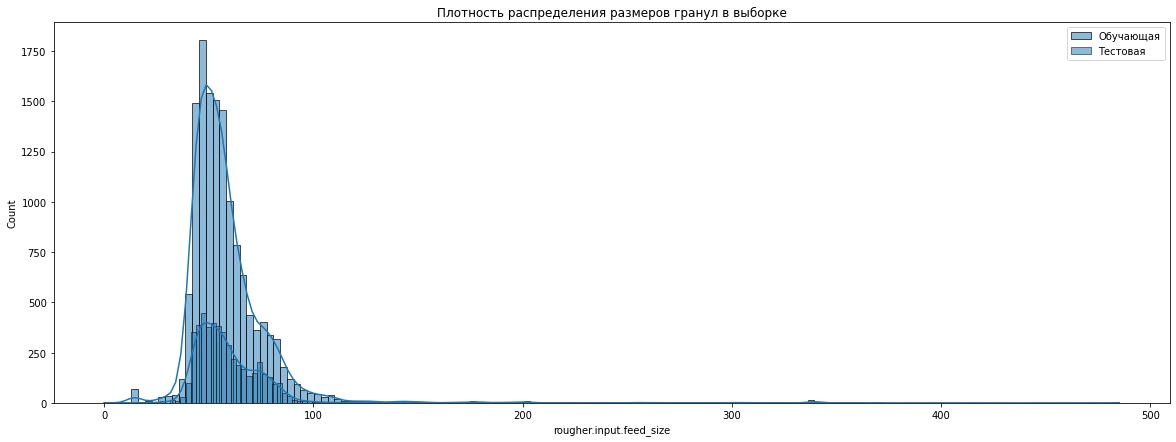

In [22]:
plt.figure(figsize=(20,7))
sns.histplot(data=data_train['rougher.input.feed_size'], bins=150, label='Обучающая', kde=True)
sns.histplot(data=data_test['rougher.input.feed_size'], bins=150, label='Тестовая', kde=True)
plt.title('Плотность распределения размеров гранул в выборке')
plt.legend()
plt.show()

Гистограммы плотности распределения размеров гранул в выборках схожи, можно сделать вывод,  что распределения не сильно отличаются друг от друга, оценка модели будет правильной.

### Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

In [23]:
metal = ['au', 'ag', 'pb']

In [24]:
def sum_concentration_percent(data, metals):
    data_copy = data.copy()  # Создание копии датасета
    stages = [
        "rougher.input.feed_",
        "rougher.output.concentrate_",
        "primary_cleaner.output.concentrate_",
        "final.output.concentrate_",
    ]

    stage_names = ["Сырьё", "Флотация", "Первичная очистка", "Вторичная очистка"]

    for stage, stage_name in zip(stages, stage_names):
        total_concentration = None
        for metal in metals:
            con = f"{stage}{metal}"
            if total_concentration is None:
                total_concentration = data_copy[con]  
            else:
                total_concentration += data_copy[con]  

        data_copy[f"{stage_name}_total_concentration"] = total_concentration  

    denominators = [
        data_copy[f"{stage_name}_total_concentration"].sum() for stage_name in stage_names  
    ]
    total_sum = sum(denominators)

    all_columns = [f"{stage_name}_total_concentration" for stage_name in stage_names]
    data_melted = pd.melt(
        data_copy,  
        value_vars=all_columns,
        var_name="Этап обработки",
        value_name="Суммарная концентрация",
    )

    data_melted["Процент"] = data_melted.apply(
        lambda row: row["Суммарная концентрация"] * 100 / total_sum, axis=1
    )

    plt.figure(figsize=(12, 8))
    sns.histplot(
        data=data_melted,
        x="Процент",
        hue="Этап обработки",
        bins=30,
        kde=True,
        common_norm=False,
    )
    plt.title("Суммарная концентрация металлов на разных этапах производства в процентах")
    plt.show()

    for stage_name, denominator in zip(stage_names, denominators):
        print(
            f"Суммарная концентрация металлов на этапе {stage_name} составляет {denominator / total_sum:.1%}"
        )

    return data_melted

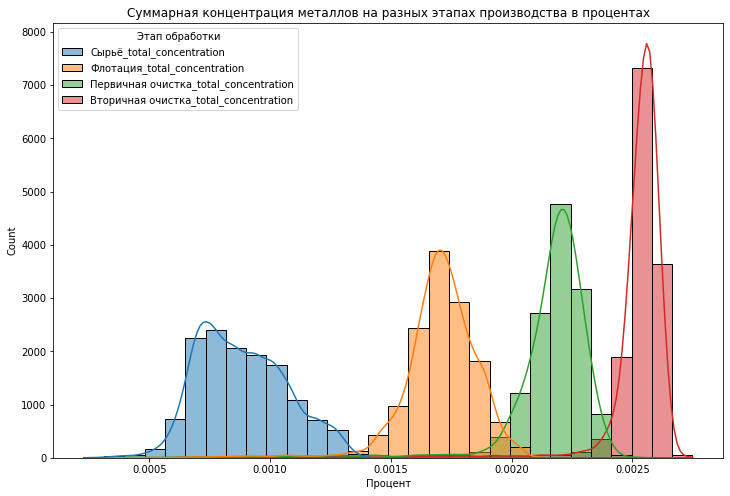

Суммарная концентрация металлов на этапе Сырьё составляет 12.2%
Суммарная концентрация металлов на этапе Флотация составляет 23.5%
Суммарная концентрация металлов на этапе Первичная очистка составляет 29.7%
Суммарная концентрация металлов на этапе Вторичная очистка составляет 34.7%


,Этап обработки,Суммарная концентрация,Процент
0,Сырьё_total_concentration,14.871440,0.000629
1,Сырьё_total_concentration,14.905729,0.000631
2,Сырьё_total_concentration,14.638299,0.000619
3,Сырьё_total_concentration,14.199305,0.000601
4,Сырьё_total_concentration,13.511497,0.000572
...,...,...,...
55003,Вторичная очистка_total_concentration,61.546553,0.002605
55004,Вторичная очистка_total_concentration,61.575144,0.002606
55005,Вторичная очистка_total_concentration,61.295107,0.002594
55006,Вторичная очистка_total_concentration,61.412113,0.002599


In [25]:
sum_concentration_percent(data_train, metal)

## Модель

### Функция вычисления sMAPE

In [26]:
def sMAPE(y, y_pred):
    y, y_pred = np.array(y), np.array(y_pred)
    return np.mean(np.abs(y - y_pred) / ((np.abs(y) + np.abs(y_pred)) / 2)) * 100

### Функция вычисления итоговой sMAPE

In [27]:
def sMAPE_sum(sMAPE_rough, sMAPE_final, weights=(0.25, 0.75)):
    return sum(sMAPE * weight for sMAPE, weight in zip([sMAPE_rough, sMAPE_final], weights))

###  Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы.

В исследовании будут учавстовать модели линейной регрессии и случайного леса. 

In [28]:
# Добавим в тестовую выборку целевые признаки.
data_test = data_test.merge(data_full[['rougher.output.recovery', 'final.output.recovery']], 'left', 'date')

# Оставим в тренеровочном датасете только признаки, присутствующие в тестовом
data_train = data_train[data_test.columns]

In [29]:
# Выделяем признаки и целевой признак
X_train = data_train.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_train = data_train[['rougher.output.recovery', 'final.output.recovery']]

X_test = data_test.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
y_test = data_test[['rougher.output.recovery', 'final.output.recovery']]

# Получаем отдельные целевые признаки для обучающей выборки
y1_train = y_train['rougher.output.recovery']
y2_train = y_train['final.output.recovery']

# Также определяем отдельные целевые признаки для тестовой выборки
y1_test = y_test['rougher.output.recovery']
y2_test = y_test['final.output.recovery']

In [30]:
# Создали свою метрику на основе smape
score_smape = make_scorer(sMAPE, greater_is_better=False)

In [31]:
# Мастабируем признаки для линейной регрессии
scaler = StandardScaler()
# Обучаем scaler на обучающих данных
X_train_scaled = scaler.fit_transform(X_train)

In [32]:
# линейнея регрессия 
model =  LinearRegression()
scores = cross_val_score(model, X_train_scaled, y1_train, scoring=score_smape, cv=5) 
scores_2 = cross_val_score(model, X_train_scaled, y2_train, scoring=score_smape, cv=5)

#  Считаем среднее sMAPE 
smape_mean_1 = abs(scores.mean())
smape_mean_2 = abs(scores_2.mean())
print(f'sMaPE_1 на кросс-валидации = {smape_mean_1}')
print(f'sMaPE_2 на кросс-валидации = {smape_mean_2}')

final_smape = sMAPE_sum(smape_mean_1, smape_mean_2)
print('Финальная sMAPE для валидации:', final_smape)

sMaPE_1 на кросс-валидации = 7.073229813615365
sMaPE_2 на кросс-валидации = 9.39976246748129
Финальная sMAPE для валидации: 8.818129304014809


In [37]:
# Случайный лес
# Задаем параметры модели
param_grid = {
    'n_estimators': [10, 20, 30, 40, 50],
    'max_depth': range(1, 11)
}

# Создаем модель случайного леса
rf_model = RandomForestRegressor(random_state=random_state)

# Настраиваем GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, scoring=score_smape, cv=5, n_jobs=-1)
# Обучение и кросс-валидация для первого целевого признака
grid_search.fit(X_train_scaled, y1_train)
best_params_1 = grid_search.best_params_
print(f'Лучшие параметры для первого целевого признака: {best_params_1}')

# Создаем новую модель с оптимальными параметрами для первого целевого признака
best_rf_model_1 = RandomForestRegressor(**best_params_1)
scores_rf_1 = cross_val_score(best_rf_model_1, X_train_scaled, y1_train, scoring=score_smape, cv=5)

# Обучение и кросс-валидация для второго целевого признака
grid_search.fit(X_train_scaled, y2_train)
best_params_2 = grid_search.best_params_
print(f'Лучшие параметры для второго целевого признака: {best_params_2}')

# Создаем новую модель с оптимальными параметрами для второго целевого признака
best_rf_model_2 = RandomForestRegressor(**best_params_2)
scores_rf_2 = cross_val_score(best_rf_model_2, X_train_scaled, y2_train, scoring=score_smape, cv=5)

# Считаем среднее sMAPE
smape_rf_mean_1 = abs(scores_rf_1.mean())
smape_rf_mean_2 = abs(scores_rf_2.mean())
print(f'sMaPE_1 на кросс-валидации (Случайный лес) = {smape_rf_mean_1}')
print(f'sMaPE_2 на кросс-валидации (Случайный лес) = {smape_rf_mean_2}')

final_smape_rf = sMAPE_sum(smape_rf_mean_1, smape_rf_mean_2)
print(f'Финальное sMAPE на кросс-валидации (Случайный лес) = {final_smape_rf}')

Лучшие параметры для первого целевого признака: {'max_depth': 5, 'n_estimators': 40}
Лучшие параметры для второго целевого признака: {'max_depth': 2, 'n_estimators': 20}
sMaPE_1 на кросс-валидации (Случайный лес) = 6.327975003047489
sMaPE_2 на кросс-валидации (Случайный лес) = 8.559578996894995
Финальное sMAPE на кросс-валидации (Случайный лес) = 8.001677998433118


Случайный лес показывает лучше результаты.

In [38]:
# Обучаем модель на X_train_scaled и y1_train, y2_train, используя лучшие параметры
best_rf_model_1.fit(X_train_scaled, y1_train)
best_rf_model_2.fit(X_train_scaled, y2_train)

# Делаем предсказания для тестовой выборки
y1_test_pred_rf = best_rf_model_1.predict(X_test_scaled)
y2_test_pred_rf = best_rf_model_2.predict(X_test_scaled)

# Вычисляем sMAPE на тестовой выборке для случайного леса
smape_rougher_test_rf = sMAPE(y_test['rougher.output.recovery'], y1_test_pred_rf)
smape_final_test_rf = sMAPE(y_test['final.output.recovery'], y2_test_pred_rf)
print(f'sMape для rougher.output.recovery :{smape_rougher_test_rf}')
print(f'sMape для final.output.recovery :{smape_final_test_rf}')
final_smape_test_rf = sMAPE_sum(smape_rougher_test_rf, smape_final_test_rf)
print('Финальная sMAPE для тестовой выборки (Случайный лес):', final_smape_test_rf)

sMape для rougher.output.recovery :3.8445303360968923
sMape для final.output.recovery :8.535783017774888
Финальная sMAPE для тестовой выборки (Случайный лес): 7.362969847355388


### Константая модель для сравнения показателей

In [41]:
# Создаем модель DummyRegressor
dummy_model_1 = DummyRegressor(strategy='mean')
dummy_model_2 = DummyRegressor(strategy='mean')

# Обучение модели на данных
dummy_model_1.fit(X_train_scaled, y1_train)
dummy_model_2.fit(X_train_scaled, y2_train)

# Считаем sMAPE для каждого целевого признака
scores_dummy_1 = cross_val_score(dummy_model_1, X_train_scaled, y1_train, scoring=score_smape, cv=5)
scores_dummy_2 = cross_val_score(dummy_model_2, X_train_scaled, y2_train, scoring=score_smape, cv=5)

smape_dummy_mean_1 = abs(scores_dummy_1.mean())
smape_dummy_mean_2 = abs(scores_dummy_2.mean())

print(f'sMaPE_1 на кросс-валидации (DummyRegressor) = {smape_dummy_mean_1}')
print(f'sMaPE_2 на кросс-валидации (DummyRegressor) = {smape_dummy_mean_2}')

# Считаем финальное sMAPE для константной модели
final_smape_dummy = sMAPE_sum(smape_dummy_mean_1, smape_dummy_mean_2)

print(f'Финальное sMAPE на кросс-валидации (DummyRegressor) = {final_smape_dummy}')

sMaPE_1 на кросс-валидации (DummyRegressor) = 7.283459863889999
sMaPE_2 на кросс-валидации (DummyRegressor) = 9.793195207865196
Финальное sMAPE на кросс-валидации (DummyRegressor) = 9.165761371871398


Модель случайного леса показывает лучшие результаты по сравнению с константной моделью на тестовой выборке. sMAPE для случайного леса составляет 7.362969847355388, в то время как для константной модели - 9.165761371871398. Мы видим, что случайный лес дает консистентно более точные результаты в прогнозировании оценок эффективности обогащения. Это означает, что с использованием этой модели мы можем получить лучшую оценку результата процесса обогащения.

## Вывод

Тезисно пробежимся по проекту:
- Загрузили датасеты и изучили их, попутно проиндексировали датасеты по столбцу 'date'
- Проверели датасеты на пропуски, пропуски удалять не стали, заменили их предыдущими значениями, так как в текущих данных последовательные процессы. 
- Проверили датасеты на дубликаты - не обнаружили
- Написали функцию для расчета  эффективности обогащения 
- Вычислили MAE rougher.output.recovery - оно стремится к нулю, поэтому можно сказать что эффективности обогащения рассчитана правильно. 
- Выявили отстуствующие признаки в тестовом датасете
- Написали функцию для визуализации концетрации металлов
- При изучении гистограмм выявили нулевые значения, решили убрать их, чтобы они не искажали показатели модели
- Сравнили распределения размеров гранул исходного сырья на обучающей и тестовой выборках, изучив гистограмму можно придти к выводу, что распределения не сильно различаются и оценка моделей будет правильной. 
- Исследовали суммарную концетрацию металлов на каждом этапе, построили гистограмму для визуализации, а также текстовую сноску в процентном соотношении по каждому шагу. 
- Написали функции для подсчета sMAPE и финальной sMAPE
- Выбрал модели линейной регресси и случайного леса
- Перед построением модели поработали с датасетами:

    - Добавили в тестовую выборку целевые признаки и в тренеровочном датасете оставили только признаки, присутствующие в тестовом
    - Выделили признаки и целевые признаки
    - Соединили обучающие и тестовые выборки перед разделением
    - Поделили данные на обучающую и валидационную выборки в соотношении 80\20
- Создали свою метрику на основе smape - "score_smape = make_scorer"
- Произвели масштабирование признаков для линейной регрессии
- Построили модели линейной регрессии и случайного леса, с подсчетом smape на валидационной выборке. 
- Лучшая модель - модель случайного леса, правда есть 1 минус, подбор гиперпараметров занимает очень много времени. 
- Произвели предсказания на тестовых данных и победила опять же модель случайного леса с лучшими параметрами, которые мы нашли при предсказывании на валидации
- Финальная sMAPE для тестовой выборки (Случайный лес): 7.362969847355388
- Погдотовили констаную модель и сравнили полученные данные константной модели с данными модели случайного леса на тестовой выборке. 